# QTM 151 - Quiz 2 

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [11]:
# Write your answer here
print("Zihan Liang")

Zihan Liang


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your answer here:
print("I will abide by Emory's code of conduct")

I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "numpy", "matplotlib.pyplot", <br>
"pandas", "statsmodels.api" and "statsmodels.formula.api"


In [3]:
# Write your answer here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

<font size = "5">

Read the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting <br>
to get a sense of its content

In [4]:
# Write your own code
df = pd.read_csv('E:/Education/Quantitative Theory & Methods/151 Introduction to Statistical Computing II/qtm151/qtm151/quizzes/02-quiz/data_quiz/fifa23_players_basic.csv')
print(df.head())
print(df.info())
print(df.columns)

   Unnamed: 0        Known As           Full Name  Overall  Potential  \
0           0        L. Messi        Lionel Messi       91         91   
1           1      K. Benzema       Karim Benzema       91         91   
2           2  R. Lewandowski  Robert Lewandowski       91         91   
3           3    K. De Bruyne     Kevin De Bruyne       91         91   
4           4       K. Mbappé       Kylian Mbappé       91         95   

   Value(in Euro) Positions Played Best Position Nationality  \
0        54000000               RW           CAM   Argentina   
1        64000000            CF,ST            CF      France   
2        84000000               ST            ST      Poland   
3       107500000           CM,CAM            CM     Belgium   
4       190500000            ST,LW            ST      France   

                                         Image Link  ...  Preferred Foot  \
0  https://cdn.sofifa.net/players/158/023/23_60.png  ...            Left   
1  https://cdn.sofifa.ne

<font size = "5">

(a) Use queries + global variables

<font size = "3">

- Subset the players whose value of the column "On Loan" is "YES" <br>
and store it in a new dataset
- How many players are on loan?

HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
and when the value is a string. <br>
Reference the column as ``` `On Loan` ``` inside .query()

In [5]:
# Write your own code
on_loan_players = df.query('`On Loan` == "YES"')
num_on_loan_players = len(on_loan_players)
print(f'The number of players on loan: {num_on_loan_players}')

The number of players on loan: 1229


<font size = "5">

(b) Create a function and apply it to a column <br>

<font size = "3">

Step 1:
- Define a function with a parameter "Overall"
- If "Overall > 90", classification = "Top Performer"
- If "Overall <= 90", classification = "Non Top-Performer"
- The function returns "classification"

Step 2:
- Extract the column "Overall" in the dataset <br>
(be carefeful to write the "O" capitalized)
- Create a new variable called "player_classification" <br>
to assign each player to the correct classification

HINT: Use the ".apply()" function

In [6]:
# Write your own code
def classify_player(overall):
    if overall > 90:
        return "Top Performer"
    else:
        return "Non Top-Performer"

df['player_classification'] = df['Overall'].apply(classify_player)

print(df[['Overall', 'player_classification']].head())

   Overall player_classification
0       91         Top Performer
1       91         Top Performer
2       91         Top Performer
3       91         Top Performer
4       91         Top Performer


<font size = "5">

(c) Use sorting + ".iloc[]"

<font size = "3">

The varable "Joined On" shows the date in which each player joined FIFA
- Use ".sort_values()" to order the "Joined On" column <br>
from earlier data to later date
- Get a subset with the 6 players in the dataset <br>
who joined FIFA earliest
- From this subset, display the year in which they joined <br>
by displaying the column "Joined On"

In [7]:
# Write your own code
df['Joined On'] = pd.to_datetime(df['Joined On'], errors='coerce')
df_sorted = df.sort_values(by='Joined On')
earliest_players = df_sorted.iloc[:6]
print(earliest_players['Joined On'])

8586    1970-01-01 00:00:00.000002002
10877   1970-01-01 00:00:00.000002003
4324    1970-01-01 00:00:00.000002004
11056   1970-01-01 00:00:00.000002005
10360   1970-01-01 00:00:00.000002005
11768   1970-01-01 00:00:00.000002005
Name: Joined On, dtype: datetime64[ns]


<font size = "5">

(d) Regression function

<font size = "3">

- Run a regression of "Potential" (left-hand side) on "Age" (right-hand side)
- What are the values of the coefficients?

[HINT: Use the commands ```smf.ols()``` and ```.fit()``` and ```.params``` <br>
from Lecture 11 ]


In [8]:
# Write your own code
model = smf.ols('Potential ~ Age', data=df).fit()
coefficients = model.params
print("Coefficients of the regression model:")
print(coefficients)

Coefficients of the regression model:
Intercept    79.752454
Age          -0.346103
dtype: float64


<font size = "5">

(e) Split a dataset into subsets

<font size = "3">

- Store the total number of rows of the dataset in a variable called ```n``` <br>
- Create a new variable called ```random_var``` drawn from a <br>
uniform distribution between 0 and 1 with size ```n```
- Use .query() to subset all observations with ```random_var <0.5```.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with ```random_var >= 0.5```.<br>
store it in a new dataset called "data1"

[HINT: See Lecture 2 for how to generate a uniform random variable]


In [9]:
# Write your own code
n = len(df)

df['random_var'] = np.random.uniform(0, 1, size=n)

data0 = df.query('random_var < 0.5')
data1 = df.query('random_var >= 0.5')

print(f"Data0 size: {len(data0)}, Data1 size: {len(data1)}")

Data0 size: 9204, Data1 size: 9335


<font size = "5">

(f) Create two overlapping histogram plots

<font size = "3">

- This question requires the two datasets you created in (e)
- Display the distribution of "Age" for "data0" and "data1" using <br>
```plt.hist()```
- You will need to label the axes, and the title
- To get full points, plot the histograms with the option  ```alpha = 0.5```, e.g. <br>
 ``` plt.hist(x = ..., alpha = 0.5) ``` <br>
 Make sure to substitute the corresponding "x" vector instead of ```...``` <br>
(The alpha option sets the transparency of the histogram )

Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

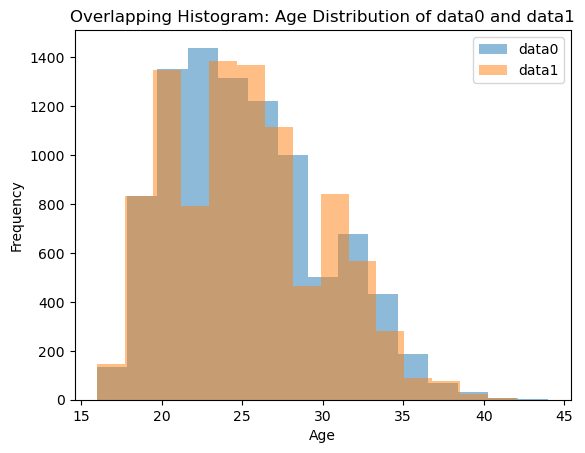

In [10]:
# Write your own code
import matplotlib.pyplot as plt

plt.hist(data0['Age'], alpha=0.5, label='data0', bins=15)
plt.hist(data1['Age'], alpha=0.5, label='data1', bins=15)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Overlapping Histogram: Age Distribution of data0 and data1')
plt.legend()

plt.show()